
**Project Title : News Article Sorting**

Problem Statement:
In today’s world, data is power. With News companies having terabytes of data stored in
servers, everyone is in the quest to discover insights that add value to the organization.
With various examples to quote in which analytics is being used to drive actions, one that
stands out is news article classification.
Nowadays on the Internet there are a lot of sources that generate immense amounts of
daily news. In addition, the demand for information by users has been growing
continuously, so it is crucial that the news is classified to allow users to access the
information of interest quickly and effectively. This way, the machine learning model for
automated news classification could be used to identify topics of untracked news and/or
make individual suggestions based on the user’s prior interests.

**Dataset File Descriptions**

BBC News Train.csv - the training set of 1490 records
BBC News Test.csv - the test set of 736 records

---



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sns.__version__)

numpy 1.26.4
pandas 2.2.2
sklearn 0.13.2


# Import Dataset

In [6]:
import pandas as pd
dataset = pd.read_csv("BBC News Train.csv")
print(dataset.head())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


# Shape of Dataset

In [7]:
dataset.shape

(1490, 3)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


# Count Values of Categories

In [9]:
dataset['Category'].value_counts()

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


In [10]:
# Assign Category names with number and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [11]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [12]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


# Data Visualization


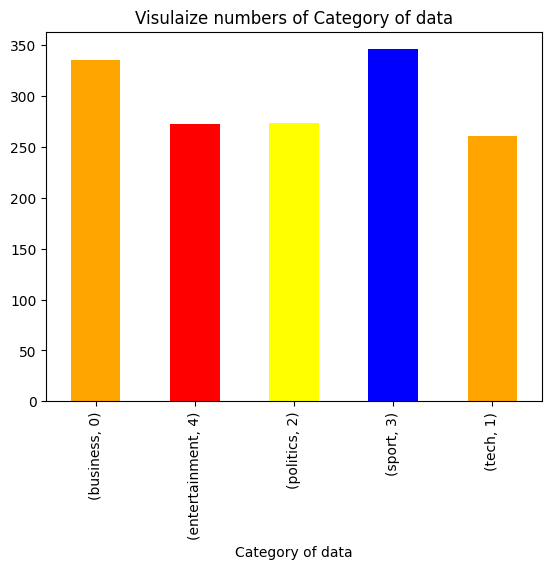

In [13]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = [ "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

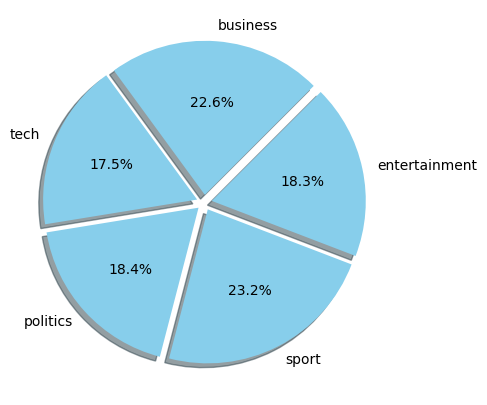

In [14]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

business related words:


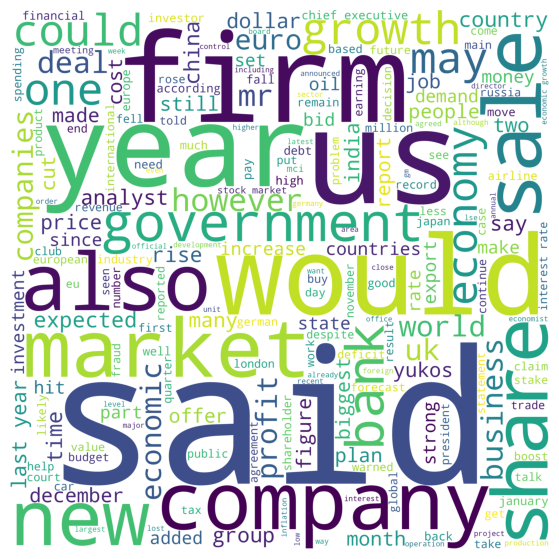

tech related words:


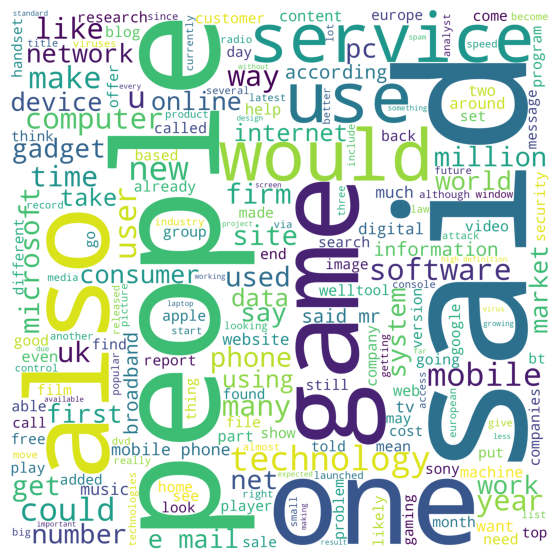

politics related words:


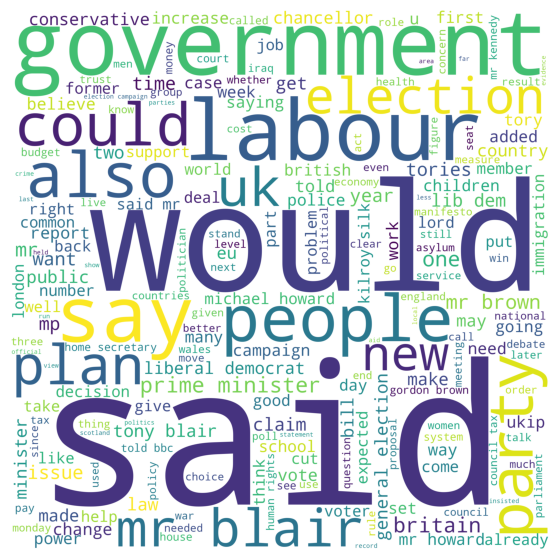

sport related words:


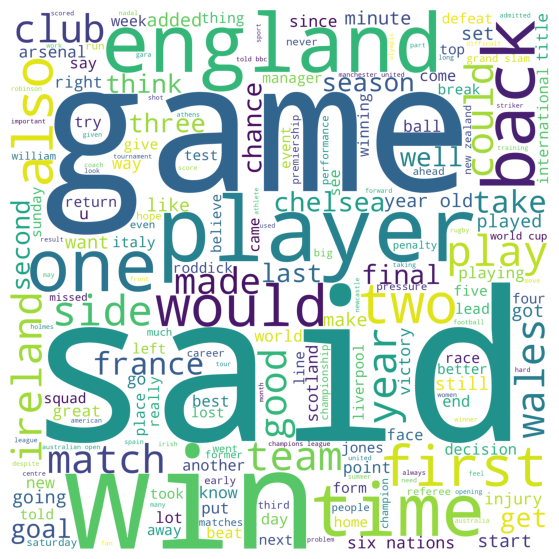

entertainment related words:


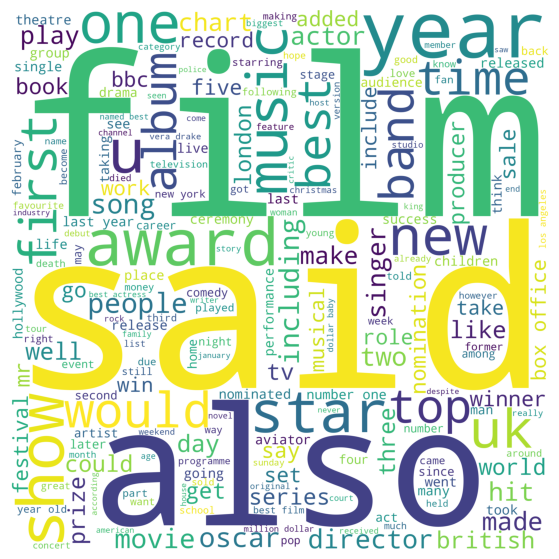

In [15]:
#use the word cloud module to show the category-related words.
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]

business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]

tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]

politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]

sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]

entertainment = entertainment['Text']

def wordcloud_draw(dataset, color = 'white'):

 words = ' '.join(dataset)

 cleaned_word = ' '.join([word for word in words.split()

 if (word != 'news' and word != 'text')])

 wordcloud = WordCloud(stopwords = stop,

 background_color = color,

 width = 2500, height = 2500).generate(cleaned_word)

 plt.figure(1, figsize = (10,7))

 plt.imshow(wordcloud)

 plt.axis("off")

 plt.show()

print("business related words:")

wordcloud_draw(business, 'white')

print("tech related words:")

wordcloud_draw(tech, 'white')

print("politics related words:")

wordcloud_draw(politics, 'white')

print("sport related words:")

wordcloud_draw(sport, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'white')

In [16]:
#Text Column of Dataset
text = dataset["Text"]
text.head(10)

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
5,howard truanted to play snooker conservative...
6,wales silent on grand slam talk rhys williams ...
7,french honour for director parker british film...
8,car giant hit by mercedes slump a slump in pro...
9,fockers fuel festive film chart comedy meet th...


In [17]:
#Category Column of Dataset
category = dataset['Category']
category.head(10)

,Category
0,business
1,business
2,business
3,tech
4,business
5,politics
6,sport
7,entertainment
8,business
9,entertainment


In [18]:
#Remove All Tags
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)

# Remove Special Characters


In [19]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

In [20]:
# We convert all articles or text to lower case.
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]


'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

# Remove Stopwords



In [21]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

# Lemmatization

In [22]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

In [23]:
#Cleaned Dataset
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


# Dependent and Independent Feature

In [24]:
x = dataset['Text']
y = dataset['CategoryId']

In [26]:
import pickle
#Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(cv, vec_file)
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (1490, 5000)
y.shape =  (1490,)


# Split dataset into train and test sets

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [28]:
#create list of model and accuracy dicts
perform_list = [ ]

# Create, Fit and Predict all ML Model

In [29]:
def run_model(model_name, est_c, est_pnlty):

  mdl=''

  if model_name == 'Logistic Regression':

    mdl = LogisticRegression()

  elif model_name == 'Random Forest':

    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

  elif model_name == 'Multinomial Naive Bayes':

    mdl = MultinomialNB(alpha=1.0,fit_prior=True)

  elif model_name == 'Support Vector Classifer':

    mdl = SVC()

  elif model_name == 'Decision Tree Classifier':

    mdl = DecisionTreeClassifier()

  elif model_name == 'K Nearest Neighbour':

    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

  elif model_name == 'Gaussian Naive Bayes':

    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)

  oneVsRest.fit(x_train, y_train)

  y_pred = oneVsRest.predict(x_test)

  # Performance metrics

  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

  # Get precision, recall, f1 scores

  precision, recall, f1score, support = score(y_test, y_pred, average='micro')

  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

  print(f'Precision : {precision}')

  print(f'Recall : {recall}')

  print(f'F1-score : {f1score}')

  # Add performance parameters to list

  perform_list.append(dict([

  ('Model', model_name),

  ('Test Accuracy', round(accuracy, 2)),

  ('Precision', round(precision, 2)),

  ('Recall', round(recall, 2)),

  ('F1', round(f1score, 2))

  ]))

# Logistic Regression

In [30]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.970917225950783


# Random Forest

In [31]:
run_model('Random Forest', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Random Forest: % 97.32
Precision : 0.9731543624161074
Recall : 0.9731543624161074
F1-score : 0.9731543624161074


# Multinomial Naive Bayes

In [32]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Multinomial Naive Bayes: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.970917225950783


# Support Vector Machine

In [33]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 96.42
Precision : 0.9642058165548099
Recall : 0.9642058165548099
F1-score : 0.9642058165548099


# Decision Tree

In [34]:

run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 81.66
Precision : 0.8165548098434005
Recall : 0.8165548098434005
F1-score : 0.8165548098434005


# KNN

In [35]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 73.38
Precision : 0.7337807606263982
Recall : 0.7337807606263982
F1-score : 0.7337807606263982


# Gaussian Naive Bayes

In [36]:

run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909
Recall : 0.7606263982102909
F1-score : 0.7606263982102909


In [37]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.09,0.97,0.97,0.97
1,Random Forest,97.32,0.97,0.97,0.97
2,Multinomial Naive Bayes,97.09,0.97,0.97,0.97
3,Support Vector Classifer,96.42,0.96,0.96,0.96
4,Decision Tree Classifier,81.66,0.82,0.82,0.82
5,K Nearest Neighbour,73.38,0.73,0.73,0.73
6,Gaussian Naive Bayes,76.06,0.76,0.76,0.76


In [38]:
#Best Model to Perform Accuracy Score

model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"Random Forest")

The best accuracy of model is 97.32 Random Forest


In [39]:
#Fit & predict best ML Model
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [40]:
#Predict News Article
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)

Sports News


In [41]:
#Save Model
import pickle

pickle.dump(classifier, open('model.pkl', 'wb'))

In [42]:
pickled_model = pickle.load(open('model.pkl','rb'))

In [43]:
#Predictions
pickled_model.predict(x_test)

array([4, 2, 3, 2, 3, 0, 0, 1, 4, 0, 3, 4, 2, 1, 3, 1, 0, 4, 1, 4, 1, 1,
       4, 1, 0, 0, 2, 3, 4, 1, 4, 3, 4, 4, 4, 0, 0, 0, 0, 1, 3, 0, 2, 0,
       3, 4, 3, 4, 1, 3, 2, 3, 4, 3, 3, 4, 4, 2, 3, 4, 3, 1, 3, 0, 3, 1,
       0, 1, 0, 4, 3, 3, 4, 1, 1, 2, 2, 2, 4, 1, 0, 1, 4, 4, 1, 3, 1, 0,
       0, 0, 0, 0, 2, 4, 2, 3, 0, 1, 4, 0, 4, 0, 0, 3, 2, 0, 3, 1, 2, 0,
       4, 4, 2, 2, 4, 4, 4, 4, 1, 2, 2, 0, 2, 3, 4, 1, 3, 3, 3, 3, 3, 3,
       0, 2, 3, 3, 3, 1, 3, 2, 0, 3, 2, 0, 4, 0, 1, 4, 2, 1, 3, 3, 3, 2,
       3, 3, 0, 4, 4, 0, 4, 0, 3, 0, 3, 3, 0, 2, 3, 0, 0, 4, 3, 4, 0, 4,
       1, 2, 0, 4, 1, 1, 1, 2, 1, 3, 0, 0, 4, 3, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 3, 0, 3, 1, 2, 3, 0, 3, 4, 0, 1, 4, 0, 0, 1, 0, 2, 1, 4, 3, 2,
       4, 4, 1, 2, 0, 0, 2, 1, 4, 3, 3, 2, 2, 1, 2, 1, 3, 0, 1, 2, 4, 0,
       3, 3, 3, 1, 0, 2, 4, 2, 0, 1, 1, 0, 2, 3, 2, 4, 0, 4, 0, 1, 3, 1,
       3, 0, 0, 0, 1, 2, 2, 2, 0, 3, 2, 3, 2, 1, 4, 1, 0, 1, 2, 4, 4, 3,
       3, 0, 0, 4, 0, 4, 3, 3, 1, 4, 4, 2, 1, 1, 4,